In [1]:
import os, sys
#EJERCICIO 1
# cargar librerías-----------------------------------------------
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import numpy as np
# cargar base----------------------------------------------------
# mb = pd.read_csv("datasets/mb.csv")
mb = pd.read_csv("Ejercicios_resueltos_Tema9_mb.csv")
# info de la base------------------------------------------------
print(mb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   alanine                1175 non-null   float64
 1   creatin.phosphate      1175 non-null   float64
 2   creatine               1175 non-null   float64
 3   cysteine               1175 non-null   float64
 4   glutamine              1175 non-null   float64
 5   n.acetylglutamine      1175 non-null   float64
 6   proline                1175 non-null   float64
 7   tryptophan             1175 non-null   float64
 8   tyrosine               1175 non-null   float64
 9   isoleucine             1175 non-null   float64
 10  leucine                1175 non-null   float64
 11  valine                 1175 non-null   float64
 12  fa.ch2ch2co            1175 non-null   float64
 13  fa.ch2ch3              1175 non-null   float64
 14  fa.ch2n                1175 non-null   float64
 15  fa.c

In [2]:
# se aplica el PCA con sklearn-----------------------------------
from sklearn.decomposition import PCA
# crear clase PCA con n componentes------------------------------
pca = PCA()
# obtener la proyeccion de la matriz mb en las comp principales--
mb_PC = pca.fit_transform(mb)
# comprobamos la dim de mb_PC------------------------------------
mb_PC.shape

(1175, 54)

In [3]:
print(pca.explained_variance_ratio_)

[6.54113751e-01 1.18315153e-01 8.57161065e-02 4.49026558e-02
 2.40614153e-02 1.57406515e-02 1.19984404e-02 1.07629315e-02
 7.25341646e-03 5.09067583e-03 4.14285028e-03 2.86864343e-03
 2.45528447e-03 1.87532558e-03 1.66420326e-03 1.51093331e-03
 1.29703833e-03 1.15389535e-03 8.64402585e-04 8.08919830e-04
 5.22737224e-04 4.35979353e-04 3.79831616e-04 3.39089074e-04
 2.91621961e-04 2.25647457e-04 1.92138875e-04 1.40931503e-04
 1.20856631e-04 1.16412240e-04 9.12743328e-05 7.54115534e-05
 6.91451154e-05 5.60639983e-05 4.88777554e-05 3.89308594e-05
 3.46320905e-05 3.20654047e-05 2.95220832e-05 2.72828096e-05
 2.34086263e-05 1.87246371e-05 1.62239037e-05 1.52212230e-05
 1.21886973e-05 1.12322939e-05 9.69063850e-06 7.50877781e-06
 6.46432045e-06 4.32411037e-06 3.67087520e-06 2.56866886e-06
 2.47900852e-06 1.14812962e-06]


In [4]:
# suma de las varianzas de todas las componentes principales-----
print(round(sum(pca.explained_variance_ratio_), 5))
# acumulado de la varianza de todas las componentes principales--
print(pca.explained_variance_ratio_.cumsum())

1.0
[0.65411375 0.7724289  0.85814501 0.90304767 0.92710908 0.94284973
 0.95484817 0.96561111 0.97286452 0.9779552  0.98209805 0.98496669
 0.98742198 0.9892973  0.9909615  0.99247244 0.99376948 0.99492337
 0.99578777 0.99659669 0.99711943 0.99755541 0.99793524 0.99827433
 0.99856595 0.9987916  0.99898374 0.99912467 0.99924553 0.99936194
 0.99945321 0.99952863 0.99959777 0.99965384 0.99970271 0.99974164
 0.99977628 0.99980834 0.99983786 0.99986515 0.99988855 0.99990728
 0.9999235  0.99993872 0.99995091 0.99996215 0.99997184 0.99997934
 0.99998581 0.99999013 0.9999938  0.99999637 0.99999885 1.        ]


In [5]:
# crear clase PCA con 7 componentes------------------------------
pca_7 = PCA(n_components = 7)
# obtener la proyeccion de la matriz mb en las com principales---
mb_PC_7 = pca_7.fit_transform(mb)
# comprobamos la dim de mb_PC------------------------------------
mb_PC_7.shape

(1175, 7)

In [6]:
print(mb_PC_7)

[[-1.30660311  0.03482856 -0.22927091 ...  0.28076227  0.21150472
  -0.17096204]
 [ 0.08136895  1.00126474  0.06910126 ...  0.32177194  0.22015808
   0.04628732]
 [ 4.451763    2.03479228  1.15494694 ... -0.755619   -0.13655109
   0.3654167 ]
 ...
 [-1.04388805  0.23547975 -0.04542943 ...  0.75669877 -0.06204387
  -0.0912457 ]
 [-2.73237092 -0.55080888  0.43984931 ... -1.06785867 -0.83001115
  -0.06147425]
 [ 2.93272656  0.64088248  0.85889471 ... -0.03090413  0.20167986
   0.13805329]]


In [7]:
# crear clase PCA con 0.95 varianza explicada--------------------
pca_7_bis = PCA(n_components = 0.95)
# obtener la proyeccion de la matriz mb en las comp principales--
mb_PC_7_bis = pca_7_bis.fit_transform(mb)
# comprobamos la dim de mb_PC------------------------------------
mb_PC_7_bis.shape

(1175, 7)

In [8]:
# se obtiene el mismo resultado que mb_PC_7----------------------
# representacion conjunto de datos en componentes principales----
mb_PC_7_df = pd.DataFrame(data = mb_PC_7, columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7"])
# primeras observaciones del nuevo conjunto de datos-------------
print(mb_PC_7_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -1.306603  0.034829 -0.229271 -0.451673  0.280762  0.211505 -0.170962
1  0.081369  1.001265  0.069101 -0.164533  0.321772  0.220158  0.046287
2  4.451763  2.034792  1.154947  0.372276 -0.755619 -0.136551  0.365417
3  2.773560 -5.209073  0.228254 -0.382472 -0.208599  0.044349 -1.104811
4  0.399323  0.036426 -0.743607  1.228068  0.175580 -0.250505 -0.358564


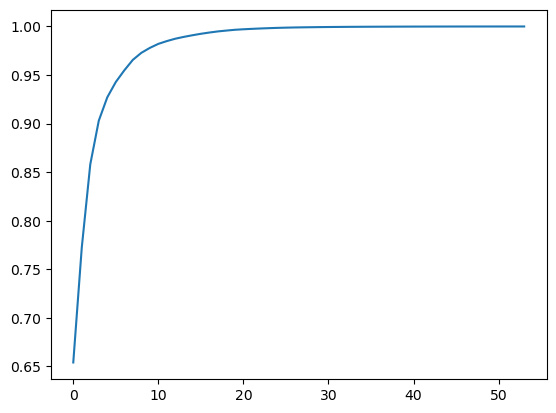

In [9]:
# representacion conjunto de datos en componentes principales----
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.show()

In [10]:
pca_10 = PCA(n_components = 10)
mb_PC_10 = pca_10.fit_transform(mb)
# representacion conjunto de datos en componentes principales----
mb_PC_10_df = pd.DataFrame(data = mb_PC_10, columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"])
# primeras observaciones del nuevo conjunto de datos-------------
print(mb_PC_10_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.306603  0.034829 -0.229271 -0.451673  0.280762  0.211505 -0.170962   
1  0.081369  1.001265  0.069101 -0.164533  0.321772  0.220158  0.046287   
2  4.451763  2.034792  1.154947  0.372276 -0.755619 -0.136551  0.365417   
3  2.773560 -5.209073  0.228254 -0.382472 -0.208599  0.044349 -1.104811   
4  0.399323  0.036426 -0.743607  1.228068  0.175580 -0.250505 -0.358564   

        PC8       PC9      PC10  
0 -0.076527 -0.342418  0.326579  
1  0.023825  0.301294  0.193152  
2 -0.767980 -0.102947 -0.160413  
3 -1.025533  0.169926 -0.091083  
4 -0.159043 -0.257653 -0.204145  


In [11]:
# varianza explicada por las componentes principales-------------
print(pca.explained_variance_)

[5.84872221e+00 1.05790845e+00 7.66425862e-01 4.01494632e-01
 2.15143824e-01 1.40744171e-01 1.07283396e-01 9.62361612e-02
 6.48560252e-02 4.55179986e-02 3.70430685e-02 2.56498178e-02
 2.19537913e-02 1.67681207e-02 1.48803821e-02 1.35099273e-02
 1.15973971e-02 1.03174920e-02 7.72900828e-03 7.23291227e-03
 4.67402620e-03 3.89828546e-03 3.39624355e-03 3.03194635e-03
 2.60752176e-03 2.01761435e-03 1.71799921e-03 1.26013130e-03
 1.08063293e-03 1.04089365e-03 8.16124437e-04 6.74288266e-04
 6.18257255e-04 5.01293164e-04 4.37037767e-04 3.48098143e-04
 3.09660937e-04 2.86711057e-04 2.63970086e-04 2.43947744e-04
 2.09306948e-04 1.67425315e-04 1.45065145e-04 1.36099730e-04
 1.08984568e-04 1.00432940e-04 8.66483123e-05 6.71393247e-05
 5.78003665e-05 3.86637955e-05 3.28229291e-05 2.29676116e-05
 2.21659186e-05 1.02659380e-05]


In [12]:
pca_2 = PCA(n_components = 2)
mb_PC_2 = pca_2.fit_transform(mb)
# representacion conjunto de datos en componentes principales----
mb_PC_2_df = pd.DataFrame(data = mb_PC_2, columns = ["PC1","PC2"])
# primeras observaciones del nuevo conjunto de datos-------------
print(mb_PC_2_df.head())

        PC1       PC2
0 -1.306603  0.034829
1  0.081369  1.001265
2  4.451763  2.034792
3  2.773560 -5.209073
4  0.399323  0.036426


In [14]:
#EJERCICIO 2
# cargar datos Iris----------------------------------------------
from sklearn.datasets import load_iris
data = load_iris()
# capturar matriz de las variables de iris-----------------------
X = data.data
# nombres variables X
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
# dimension de X
X.shape
# grupos reales (para comprobar que el clustering)--------------- 

(150, 4)

In [17]:
y = data.target

C:\Users\Jvanfran\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jvanfran\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jvanfran\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jvanfran\AppData\Roaming\Python\Python311\site-packages\sklea

(1.0, 10.5, 0.0, 300.0)

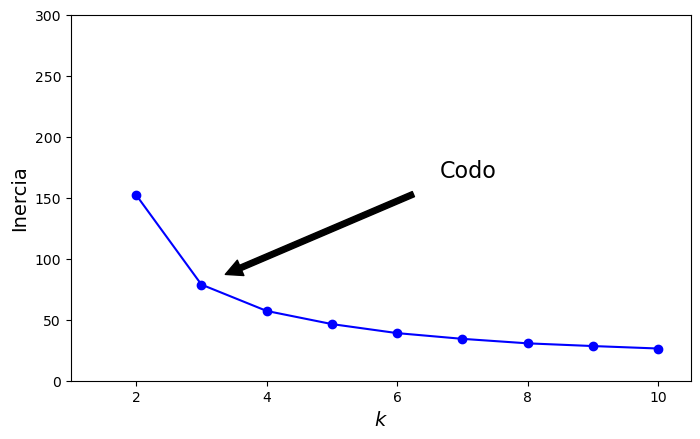

In [18]:
# definir ajuste Kmedias-----------------------------------------
kmedias_k = [KMeans(n_clusters = k, random_state = 3, n_init = 10).fit(X) for k in range(2, 11)]
inercias = [model.inertia_ for model in kmedias_k]

# pintar inercias------------------------------------------------
plt.figure(figsize=(8, 4.75))
plt.plot(range(2, 11), inercias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)

plt.annotate('Codo',
xy=(3, inercias[1]),
xytext=(0.55, 0.55),
textcoords='figure fraction',
fontsize=16,
arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.axis([1, 10.5, 0, 300])

In [19]:
plt.show()

In [21]:
# definir ajuste Kmedias con K = 3-------------------------------
kmedias_3 = KMeans(n_clusters = 3, random_state = 3, n_init = 10).fit(X)
# calcular prediccion--------------------------------------------
y_pred = kmedias_3.fit_predict(X)
# clases del clustering------------------------------------------
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


C:\Users\Jvanfran\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jvanfran\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
# clases reales--------------------------------------------------
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


[152.34795176035792, 78.85144142614601, 57.228473214285714, 46.44618205128205, 39.03998724608725, 34.3453606427897, 30.65712787650946, 28.433198809961965, 26.418867565183355]


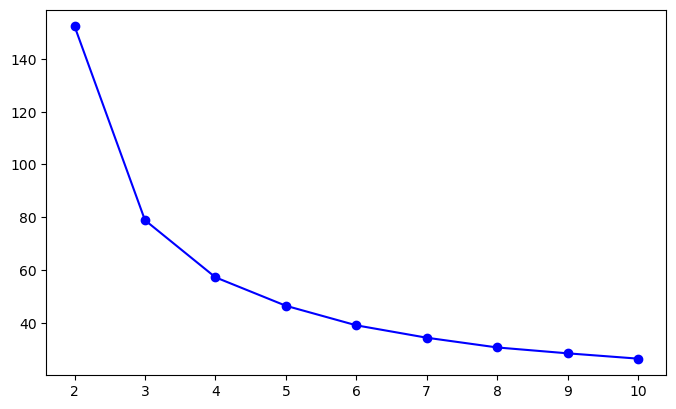

In [23]:
# definir ajuste Kmedias para la base mb-------------------------
kmedias_k_mb = [KMeans(n_clusters = k, random_state = 3, n_init = 10).fit(mb)                 for k in range(2, 26)]
inercias_mb = [model.inertia_ for model in kmedias_k_mb]
print(inercias)

# pintar inercias------------------------------------------------
plt.figure(figsize=(8, 4.75))
plt.plot(range(2, 11), inercias, "bo-")

(1.0, 25.5, 0.0, 8000.0)

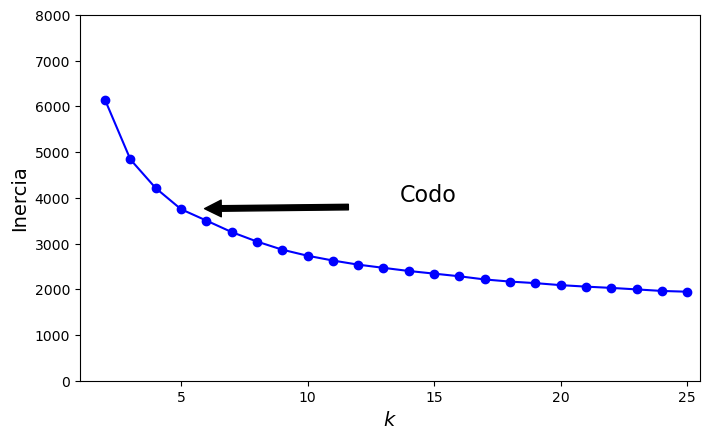

In [24]:
#EJERCICIO 3
# definir ajuste Kmedias para la base mb-------------------------
kmedias_k_mb = [KMeans(n_clusters = k, random_state = 3, n_init = 10).fit(mb) for k in range(2, 26)]
inercias_mb = [model.inertia_ for model in kmedias_k_mb]

# pintar inercias------------------------------------------------
plt.figure(figsize=(8, 4.75))
plt.plot(range(2, 26), inercias_mb, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.annotate('Codo',
xy=(4, inercias_mb[3]),
xytext=(0.5, 0.5),
             textcoords='figure fraction',
fontsize=16,
arrowprops=dict(facecolor='black', shrink=0.2)

)
plt.axis([1, 25.5, 0, 8000])

In [26]:
plt.show()

In [28]:
# definir ajuste Kmedias con K = 5-------------------------------
kmedias_5_mb = KMeans(n_clusters = 5,
random_state = 3, n_init = 10).fit(mb)
y_pred = kmedias_5_mb.fit_predict(mb)
# clases del clustering------------------------------------------
unique, counts = np.unique(y_pred, return_counts = True)
dict(zip(unique, counts))
# clases reales--------------------------------------------------

{0: 422, 1: 139, 2: 254, 3: 335, 4: 25}

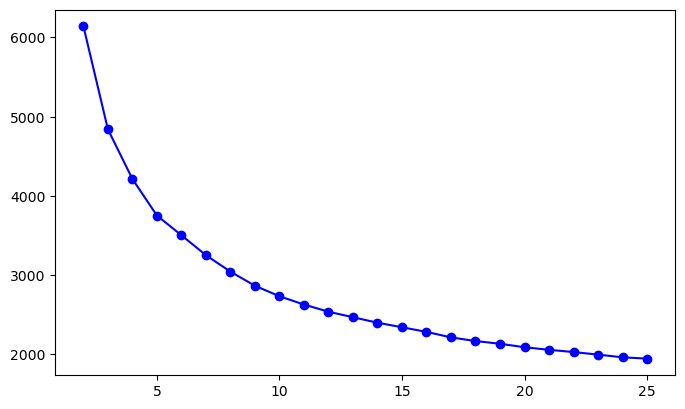

In [27]:
# pintar inercias------------------------------------------------
plt.figure(figsize=(8, 4.75))
plt.plot(range(2, 26), inercias_mb, "bo-")

(1.0, 25.5, 0.0, 8000.0)

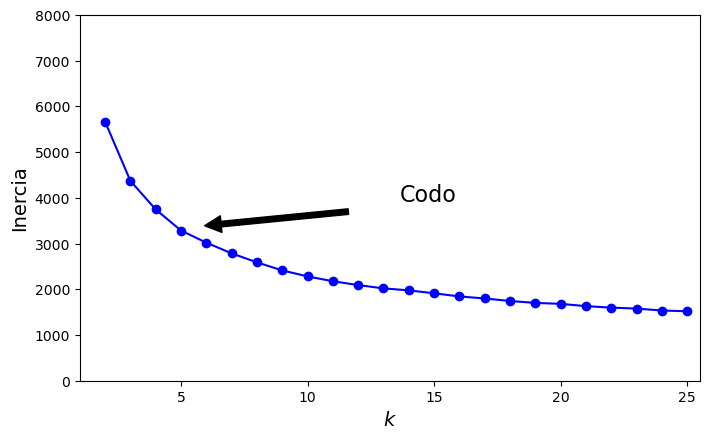

In [29]:
# definir ajuste Kmedias para la base mb-------------------------
kmedias_k_mb_PC = [KMeans(n_clusters = k, random_state = 3,
n_init = 10).fit(mb_PC_7_df)
for k in range(2, 26)]
inercias_mb_PC = [model.inertia_ for model in kmedias_k_mb_PC]

# pintar inercias------------------------------------------------
plt.figure(figsize=(8, 4.75))
plt.plot(range(2, 26), inercias_mb_PC, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.annotate('Codo',
xy=(4, inercias_mb_PC[3]),
xytext=(0.5, 0.5),
textcoords='figure fraction',
fontsize=16,
arrowprops=dict(facecolor='black', shrink=0.2)
)
plt.axis([1, 25.5, 0, 8000])

In [30]:
plt.show()

In [31]:
# definir ajuste Kmedias con K = 5-------------------------------
kmedias_5_mb_PC = KMeans(n_clusters = 5,
random_state = 3, n_init = 10).fit(mb_PC_7_df)
y_pred = kmedias_5_mb_PC.fit_predict(mb_PC_7_df)
# clases del clustering------------------------------------------
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))
# clases reales--------------------------------------------------

{0: 26, 1: 343, 2: 243, 3: 142, 4: 421}

In [32]:
# definir ajuste Kmedias con K = 5-------------------------------
kmedias_5_mb_PC = KMeans(n_clusters = 5, random_state = 3, n_init = 10).fit(mb_PC_7_df)
y_pred = kmedias_5_mb_PC.fit_predict(mb_PC_7_df)
print(y_pred)

[1 4 2 ... 1 3 2]
